# Setup Instructions

Before running this notebook, ensure you have the required packages installed.

## Installation Steps:

1. **Create a virtual environment** (if not already created):
   ```bash
   python3 -m venv env
   ```

2. **Activate the virtual environment**:
   ```bash
   source env/bin/activate  # On macOS/Linux
   # OR
   env\Scripts\activate  # On Windows
   ```

3. **Install required packages**:
   ```bash
   pip install -r requirements.txt
   ```

4. **Select the correct kernel** in Jupyter:
   - Click on the kernel selector in the top right
   - Choose the Python interpreter from your `env` folder

5. **Restart the kernel** after installation to ensure all packages are loaded correctly.


# Data Loading and Inspection

This notebook loads the raw data from CSV files, verifies their structure and dimensions, and displays basic statistics.

In [ ]:
import kagglehub
#https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024/data

# Download latest version
path = kagglehub.dataset_download("asaniczka/1-3m-linkedin-jobs-and-skills-2024")

print("Path to dataset files:", path)

Resuming download from 77594624 bytes (1937590085 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/asaniczka/1-3m-linkedin-jobs-and-skills-2024?dataset_version_number=2 (77594624/2015184709) bytes left.


 41%|████      | 789M/1.88G [02:37<04:09, 4.76MB/s] 


KeyboardInterrupt: 

In [161]:
pip install -r requirements.txt

You should consider upgrading via the '/Users/soumyadeep/Documents/workspace/DSA-with-C-and-go/Project/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [162]:
import pandas as pd
import numpy as np
import os
from skillNer.skill_extractor_class import SkillExtractor  # after you `pip install skillNer`
import spacy

# Define file paths
files = {
    'job_postings': 'linkedin_job_postings.csv',
    'job_skills': 'job_skills.csv',
    'job_summary': 'job_summary.csv'
}

def inspect_data(name, filepath):
    print(f"\n{'='*20} Loading {name} {'='*20}")
    if not os.path.exists(filepath):
        print(f"File not found: {filepath}")
        return None
    
    try:
        if name == 'job_summary':
            print("Large file detected. Loading first 100,000 rows for inspection to save memory.")
            df = pd.read_csv(filepath, nrows=100000)
        else:
            df = pd.read_csv(filepath)
            
        print(f"Successfully loaded {name}")
        print(f"Shape (Rows, Columns): {df.shape}")
        
        print("\n--- First 5 Rows ---")
        display(df.head())
        
        print("\n--- Basic Statistics ---")
        display(df.describe(include='all'))
        
        print("\n--- Info ---")
        print(df.info())
        
        return df
    except Exception as e:
        print(f"Error loading {filepath}: {e}")
        return None


In [163]:
dataframes = {}
for name, filepath in files.items():
    df = inspect_data(name, filepath)
    if df is not None:
        dataframes[name] = df

print(df.columns)


==================== Loading job_postings ====================
Successfully loaded job_postings
Shape (Rows, Columns): (1348454, 14)

--- First 5 Rows ---


,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite



--- Basic Statistics ---


,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
count,1348454,1348454,1348454,1348454,1348454,1348454,1348443,1348435,1348454,1348454,1348454,1348454,1348454,1348454
unique,1348454,722748,2,2,2,584544,90605,29153,6,1018,4,1993,2,3
top,https://www.linkedin.com/jobs/view/account-exe...,2024-01-19 09:45:09.215838+00,t,t,f,LEAD SALES ASSOCIATE-FT,Health eCareers,"New York, NY",2024-01-14,Baytown,United States,Account Executive,Mid senior,Onsite
freq,1,625540,1297877,1296401,1346978,7325,41598,13436,460035,10052,1149342,19468,1204445,1337633



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348454 entries, 0 to 1348453
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   job_link             1348454 non-null  object
 1   last_processed_time  1348454 non-null  object
 2   got_summary          1348454 non-null  object
 3   got_ner              1348454 non-null  object
 4   is_being_worked      1348454 non-null  object
 5   job_title            1348454 non-null  object
 6   company              1348443 non-null  object
 7   job_location         1348435 non-null  object
 8   first_seen           1348454 non-null  object
 9   search_city          1348454 non-null  object
 10  search_country       1348454 non-null  object
 11  search_position      1348454 non-null  object
 12  job_level            1348454 non-null  object
 13  job_type             1348454 non-null  object
dtypes: object(14)
memory usage: 144.0+ MB
None

========

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."



--- Basic Statistics ---


,job_link,job_skills
count,1296381,1294296
unique,1296381,1287101
top,https://www.linkedin.com/jobs/view/housekeeper...,"Front Counter, DriveThru, Outside Order Taker,..."
freq,1,169



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296381 entries, 0 to 1296380
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   job_link    1296381 non-null  object
 1   job_skills  1294296 non-null  object
dtypes: object(2)
memory usage: 19.8+ MB
None

==================== Loading job_summary ====================
Large file detected. Loading first 100,000 rows for inspection to save memory.
Successfully loaded job_summary
Shape (Rows, Columns): (100000, 2)

--- First 5 Rows ---


,job_link,job_summary
0,https://www.linkedin.com/jobs/view/restaurant-...,Rock N Roll Sushi is hiring a Restaurant Manag...
1,https://www.linkedin.com/jobs/view/med-surg-re...,Schedule\n: PRN is required minimum 12 hours p...
2,https://www.linkedin.com/jobs/view/registered-...,Description\nIntroduction\nAre you looking for...
3,https://uk.linkedin.com/jobs/view/commercial-a...,Commercial account executive\nSheffield\nFull ...
4,https://www.linkedin.com/jobs/view/store-manag...,Address:\nUSA-CT-Newington-44 Fenn Road\nStore...



--- Basic Statistics ---


,job_link,job_summary
count,100000,100000
unique,100000,79037
top,https://www.linkedin.com/jobs/view/restaurant-...,Dollar General Corporation has been delivering...
freq,1,788



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   job_link     100000 non-null  object
 1   job_summary  100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB
None
Index(['job_link', 'job_summary'], dtype='object')


In [164]:
!python3 -m spacy download en_core_web_sm 

/Users/soumyadeep/Documents/workspace/DSA-with-C-and-go/Project/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
     |████████████████████████████████| 12.8 MB 2.8 MB/s eta 0:00:01
You should consider upgrading via the '/Users/soumyadeep/Documents/workspace/DSA-with-C-and-go/Project/env/bin/python3 -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [165]:
# Load spaCy model
import spacy
from spacy.matcher import PhraseMatcher
from skillNer.skill_extractor_class import SkillExtractor
from skillNer.general_params import SKILL_DB

nlp = spacy.load("en_core_web_sm")

# Initialize SkillExtractor with default skill set
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher)
print("✓ Skill extractor initialized.")

loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...
✓ Skill extractor initialized.


In [166]:
# ==============================================================================
# NEW CELL: Utility to extract skills from a JD string
# ==============================================================================

def extract_skills_from_text(jd_text: str):
    """
    Given a job description text, return a sorted list of unique skill names.
    """
    if not isinstance(jd_text, str) or jd_text.strip() == "":
        return []

    annotations = skill_extractor.annotate(jd_text)

    # SkillNER returns different groups; merge them into a simple set of names
    found_skills = set()

    for group_name in ["full_matches", "ngram_scored", "skill_mentions"]:
        group = annotations.get(group_name, [])
        for item in group:
            # Most variants have a 'doc_node_value' or 'skill_name' field
            name = item.get("doc_node_value") or item.get("skill_name")
            if isinstance(name, str):
                found_skills.add(name.strip())

    return sorted(found_skills)


# Data Cleaning

Steps:
1. **Missing Values**: Identify and handle missing values (Impute or Drop).
2. **Duplicates**: Remove duplicate rows.
3. **Inconsistencies**: Fix formatting issues (e.g., stripping whitespace).
4. **Data Types**: specific conversions (like dates).
5. **Outliers**: Clip numeric outliers using IQR.


In [167]:
import numpy as np

def clean_dataframe(name, df):
    print(f"\n{'='*20} Cleaning {name} {'='*20}")
    
    # 1. Remove Duplicates
    original_rows = len(df)
    df = df.drop_duplicates()
    dropped_rows = original_rows - len(df)
    if dropped_rows > 0:
        print(f"Dropped {dropped_rows} duplicate rows.")
    
    # 2. Handle Missing Values
    print("\n--- Missing Values Before ---")
    missing_counts = df.isnull().sum()
    print(missing_counts[missing_counts > 0])
    
    # Strategy: 
    # - Numeric: Fill with median
    # - Categorical: Fill with 'Unknown' or Mode depending on context. 
    #   Here we use 'Unknown' for safety unless specific columns are known.
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:
            if df[col].isnull().any():
                median_val = df[col].median()
                # Direct assignment to avoid FutureWarning for inplace=True
                df[col] = df[col].fillna(median_val)
        else:
            if df[col].isnull().any():
                df[col] = df[col].fillna('Unknown')
                
    print("\nMissing values handled.")
    
    # 3. Fix Inconsistencies (String strip)
    df_obj = df.select_dtypes(['object'])
    # Update columns using direct assignment
    for col in df_obj.columns:
        df[col] = df[col].str.strip()
    
    # 4. Convert Data Types (Heuristic)
    # Check for likely date columns
    for col in df.columns:
        if 'date' in col.lower() or 'time' in col.lower():
            try:
                df[col] = pd.to_datetime(df[col], errors='coerce')
                print(f"Converted {col} to datetime.")
            except:
                pass

    # 5. Outliers (IQR Method for extensive numeric range)
    # Only applying to columns that are strictly numeric and not IDs (heuristic: high cardinality)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if 'id' in col.lower():
            continue
            
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        if outliers > 0:
            # Cap/Clip outliers
            df[col] = np.clip(df[col], lower_bound, upper_bound)
            print(f"Capped {outliers} outliers in {col}.")
            
    return df

cleaned_dataframes = {}
for name, df in dataframes.items():
    cleaned_df = clean_dataframe(name, df)
    cleaned_dataframes[name] = cleaned_df
    
    print(f"\nFinal Shape for {name}: {cleaned_df.shape}")


# ==============================================================================
# MERGE CLEANED TABLES INTO ONE CUMULATED DATASET
# ==============================================================================

print("\n================= Merging cleaned datasets =================")

merged_dataframes = {}

# Start from job_postings as the main table
base_df = cleaned_dataframes.get("job_postings")

if base_df is None:
    print("⚠️ 'job_postings' not found in cleaned_dataframes. Available keys:", list(cleaned_dataframes.keys()))
else:
    merged_df = base_df.copy()

    # 1) Merge job_skills
    if "job_skills" in cleaned_dataframes:
        print("Merging 'job_skills' on 'job_id' ...")  # <-- change key if different
        merged_df = merged_df.merge(
            cleaned_dataframes["job_skills"],
            on="job_link",         # <-- UPDATE if your key column name differs
            how="left",
            suffixes=("", "_skills")
        )
    else:
        print("⚠️ 'job_skills' dataframe not found, skipping this merge.")

    # 2) Merge job_summary
    if "job_summary" in cleaned_dataframes:
        print("Merging 'job_summary' on 'job_id' ...")  # <-- change key if different
        merged_df = merged_df.merge(
            cleaned_dataframes["job_summary"],
            on="job_link",         # <-- UPDATE if your key column name differs
            how="left",
            suffixes=("", "_summary")
        )
    else:
        print("⚠️ 'job_summary' dataframe not found, skipping this merge.")

    print("\n✓ Merging complete.")
    print("Merged shape:", merged_df.shape)

    # -------- NA ANALYSIS (already present) --------
    total_rows = len(merged_df)
    print(f"\nNA ANALYSIS on merged_df (job_all)")
    print(f"Total rows: {total_rows:,}")
    rows_with_any_na = merged_df.isna().any(axis=1).sum()
    print(f"Rows with at least one NaN: {rows_with_any_na:,} "
          f"({rows_with_any_na / total_rows:.2%} of all rows)")

    # ==============================
    # 1) DROP ROWS WITH NaN SKILLS
    # ==============================
    if "job_skills" in merged_df.columns:
        before = len(merged_df)
        merged_df = merged_df.dropna(subset=["job_skills"], how="any")
        after = len(merged_df)
        dropped = before - after
        print(f"\nDropped {dropped:,} rows where job_skills is NaN "
              f"({dropped / before:.2%} of rows).")
    else:
        print("\n⚠️ Column 'job_skills' not found; cannot drop based on skills.")

    # ==========================================
    # 2) GENERATE job_summary WHEN SKILLS EXIST
    # ==========================================
    def build_summary_from_skills(row):
        # keep existing summary
        if pd.notna(row.get("job_summary")):
            return row["job_summary"]

        skills = row.get("job_skills")

        # safety: if somehow skills missing, do not fabricate
        if pd.isna(skills):
            return row["job_summary"]

        # convert skills to text
        if isinstance(skills, (list, set, tuple)):
            skills_text = ", ".join(map(str, skills))
        else:
            skills_text = str(skills)

        # OPTIONAL: use years of experience if you have that column
        yrs = row.get("years_experience") if "years_experience" in row.index else None

        if pd.notna(yrs):
            return f"Professional with {yrs} years of experience in {skills_text}."
        else:
            return f"Professional skilled in {skills_text}."

    if "job_summary" in merged_df.columns and "job_skills" in merged_df.columns:
        before_missing = merged_df["job_summary"].isna().sum()
        print(f"\njob_summary NaNs before generation: {before_missing:,}")

        merged_df["job_summary"] = merged_df.apply(build_summary_from_skills, axis=1)

        after_missing = merged_df["job_summary"].isna().sum()
        print(f"job_summary NaNs after generation:  {after_missing:,}")
    else:
        print("\n⚠️ 'job_summary' or 'job_skills' column missing; skipping summary generation.")

    # finally store merged, cleaned dataset
    merged_dataframes["job_all"] = merged_df



==================== Cleaning job_postings ====================

--- Missing Values Before ---
company         11
job_location    19
dtype: int64

Missing values handled.
Converted last_processed_time to datetime.

Final Shape for job_postings: (1348454, 14)

==================== Cleaning job_skills ====================

--- Missing Values Before ---
job_skills    2085
dtype: int64

Missing values handled.

Final Shape for job_skills: (1296381, 2)

==================== Cleaning job_summary ====================

--- Missing Values Before ---
Series([], dtype: int64)

Missing values handled.

Final Shape for job_summary: (100000, 2)

================= Merging cleaned datasets =================
Merging 'job_skills' on 'job_id' ...
Merging 'job_summary' on 'job_id' ...

✓ Merging complete.
Merged shape: (1348454, 16)

NA ANALYSIS on merged_df (job_all)
Total rows: 1,348,454
Rows with at least one NaN: 1,248,574 (92.59% of all rows)

Dropped 52,073 rows where job_skills is NaN (3.86% of ro

# Exploratory Data Analysis (EDA)

Visualization steps:
1. **Numeric Distributions**: Histograms and Box Plots to see ranges and potential outliers.
2. **Categorical Distributions**: Bar charts for top categories.
3. **Correlations**: Heatmap to see relationships between numeric variables.


In [168]:
    # ------------------------------------------------------------------
    # NA ANALYSIS (no rows dropped here – just reporting)
    # ------------------------------------------------------------------
    total_rows = len(merged_df)
    print(f"\nNA ANALYSIS on merged_df (job_all)")
    print(f"Total rows: {total_rows:,}")


    # rows that have at least one NaN
    rows_with_any_na = merged_df.isna().any(axis=1).sum()
    portion_with_any_na = rows_with_any_na / total_rows if total_rows > 0 else 0

    print(f"Rows with at least one NaN: {rows_with_any_na:,} "
          f"({portion_with_any_na:.2%} of all rows)")

    # OPTIONAL: focus on a subset of important columns
    important_cols = [ "job_skills","job_summary" ]  # ← update to your key/critical columns
    important_cols = [c for c in important_cols if c in merged_df.columns]

    if important_cols:
        rows_with_na_imp = merged_df[important_cols].isna().any(axis=1).sum()
        portion_imp = rows_with_na_imp / total_rows if total_rows > 0 else 0
        print(f"\nRows with NaN in IMPORTANT cols {important_cols}: "
              f"{rows_with_na_imp:,} ({portion_imp:.2%} of all rows)")
    else:
        print("\nNo important columns from the list found in merged_df.")


    print("\nCleaned Data Head:")
    merged_df = merged_df.drop(columns=['got_summary', 'got_ner', 'is_being_worked'])
    
    print(merged_df.columns)
    print("\nJob Skills and Job Summary Head:")
    print(merged_df[['job_skills', 'job_summary']].head())
    


NA ANALYSIS on merged_df (job_all)
Total rows: 1,296,381
Rows with at least one NaN: 1 (0.00% of all rows)

Rows with NaN in IMPORTANT cols ['job_skills', 'job_summary']: 0 (0.00% of all rows)

Cleaned Data Head:
Index(['job_link', 'last_processed_time', 'job_title', 'company',
       'job_location', 'first_seen', 'search_city', 'search_country',
       'search_position', 'job_level', 'job_type', 'job_skills',
       'job_summary'],
      dtype='object')

Job Skills and Job Summary Head:
                                          job_skills  \
0  Medical equipment sales, Key competitors, Term...   
1  Nursing, Bachelor of Science in Nursing, Maste...   
2  Restaurant Operations Management, Inventory Ma...   
3  Real Estate, Customer Service, Sales, Negotiat...   
6  Nursing, BSN, Medical License, Virtual RN, Nur...   

                                         job_summary  
0  Professional skilled in Medical equipment sale...  
1  Professional skilled in Nursing, Bachelor of S...  
2  J


(No numeric columns to plot for job_all (merged))

=== job_all (merged): Categorical Distributions (Top 10) ===


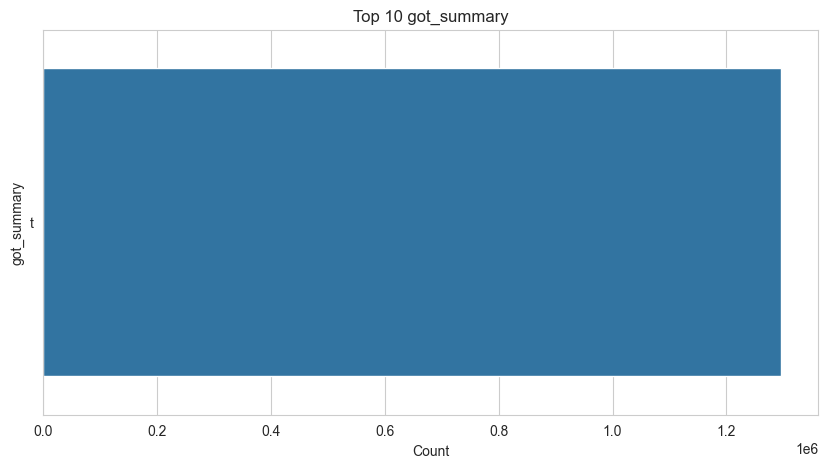

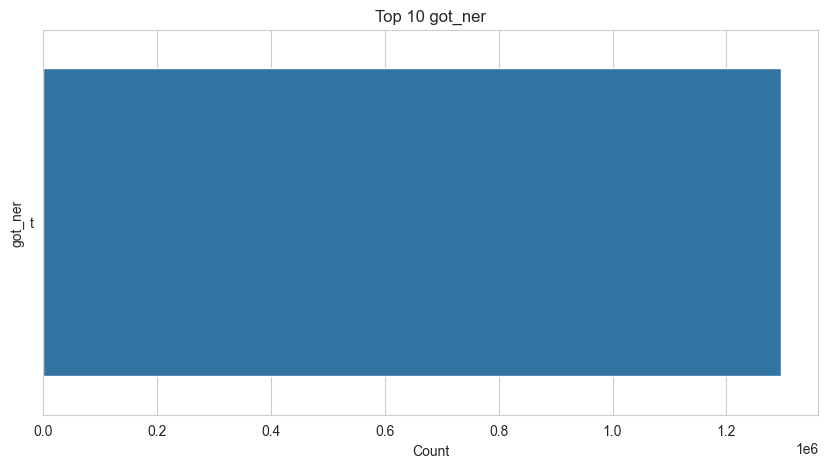

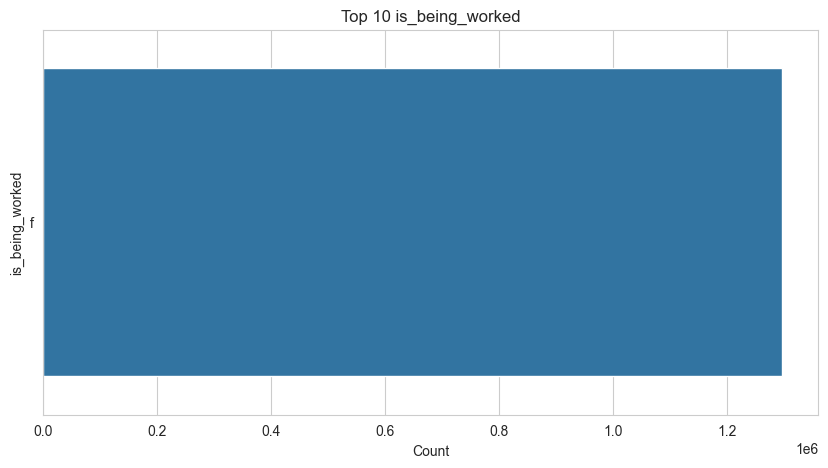

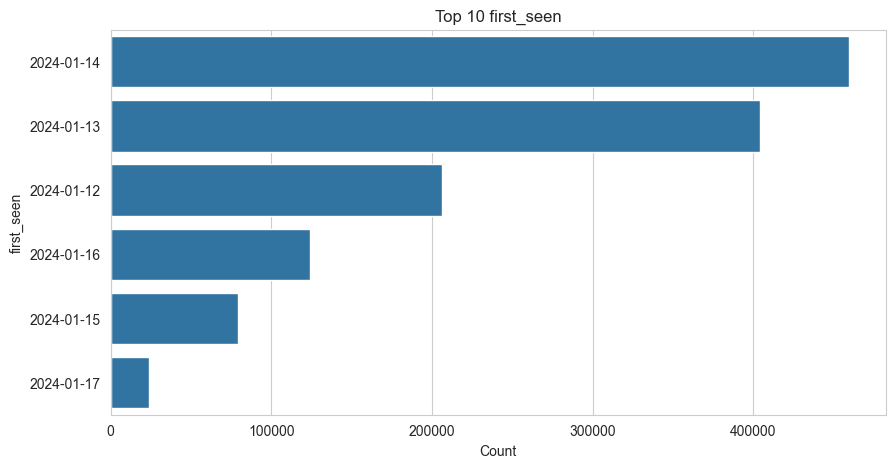

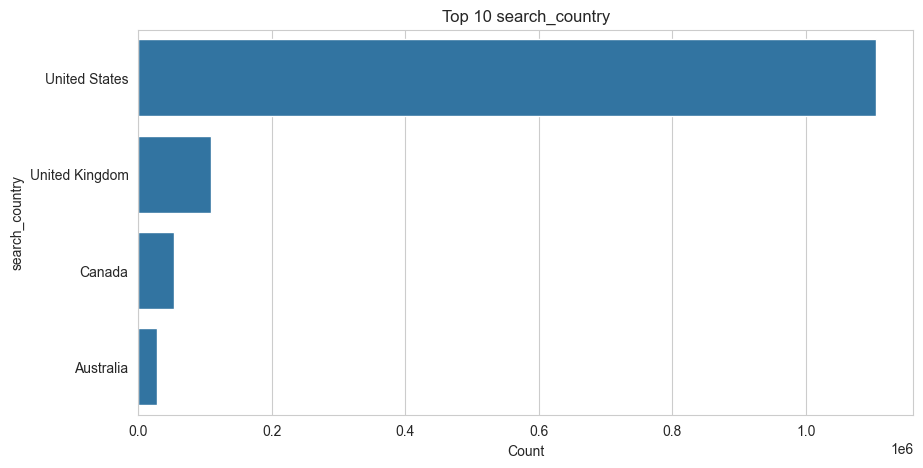

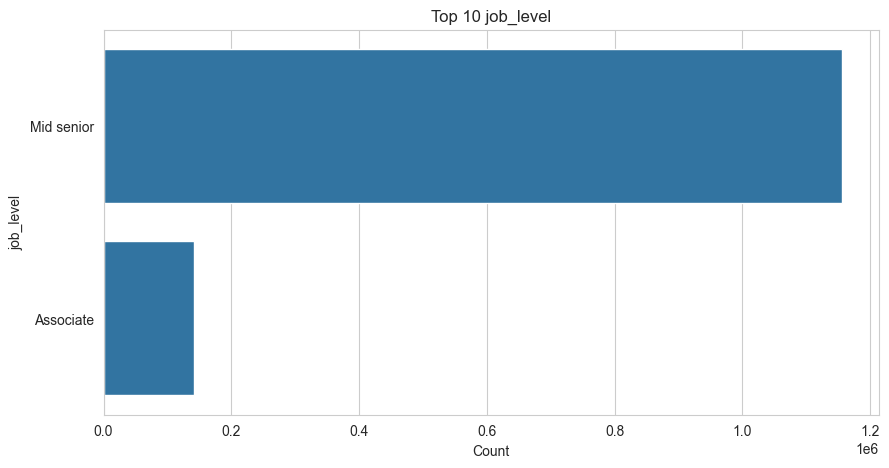

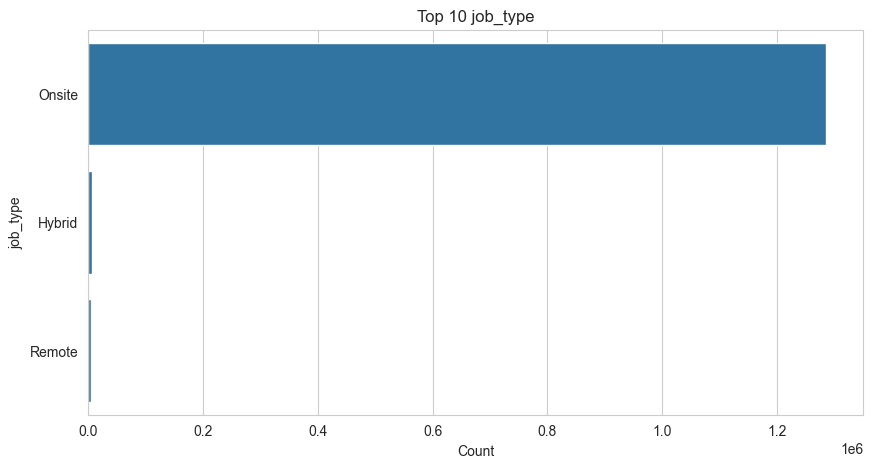


(Not enough numeric columns for correlation matrix in job_all (merged))

(No numeric columns to plot for job_postings (cleaned))

=== job_postings (cleaned): Categorical Distributions (Top 10) ===


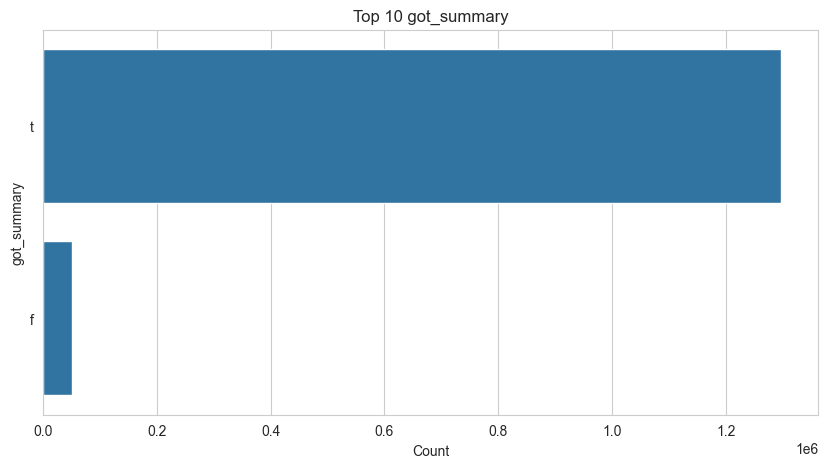

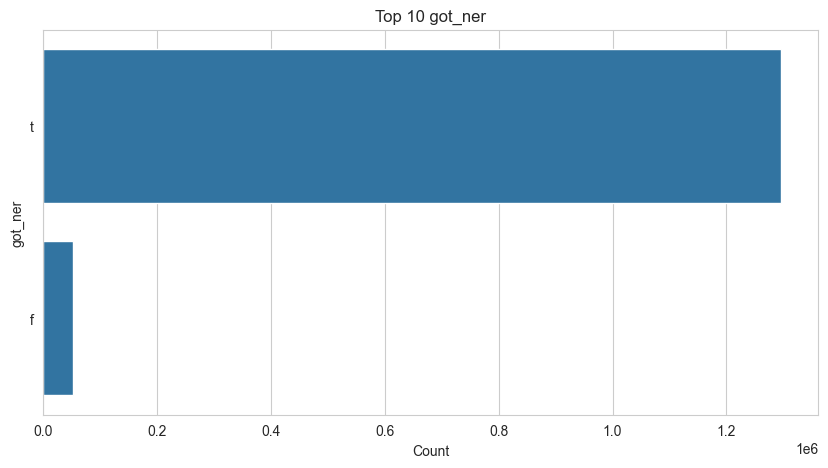

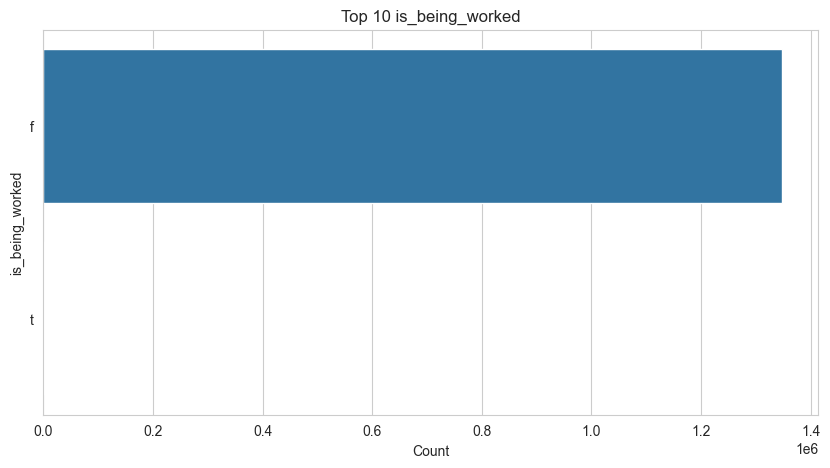

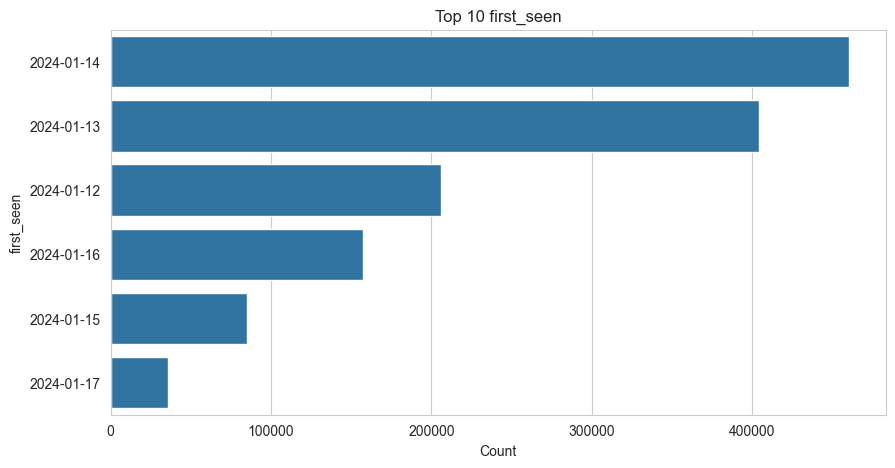

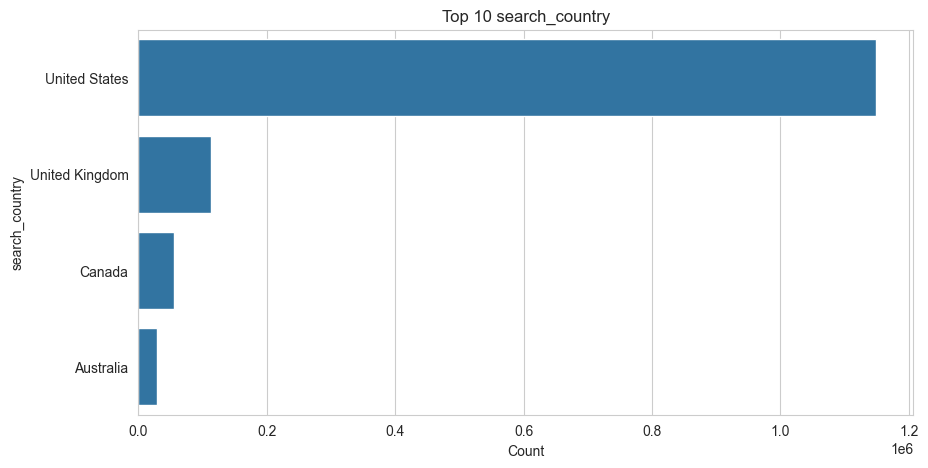

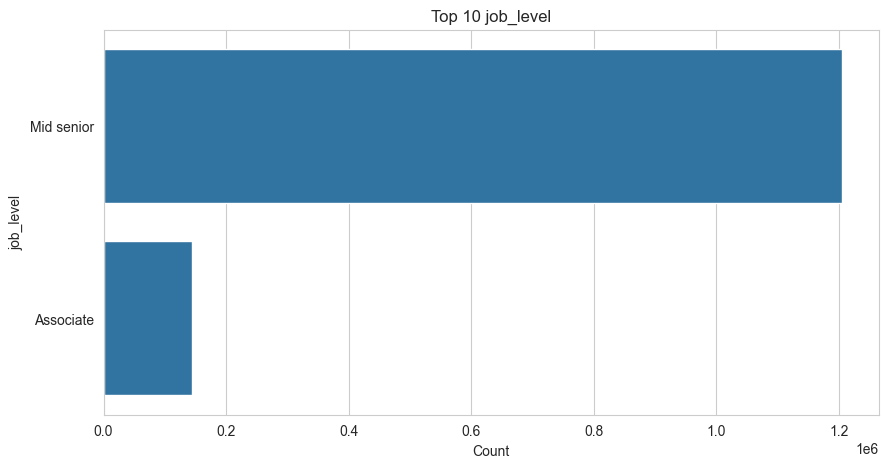

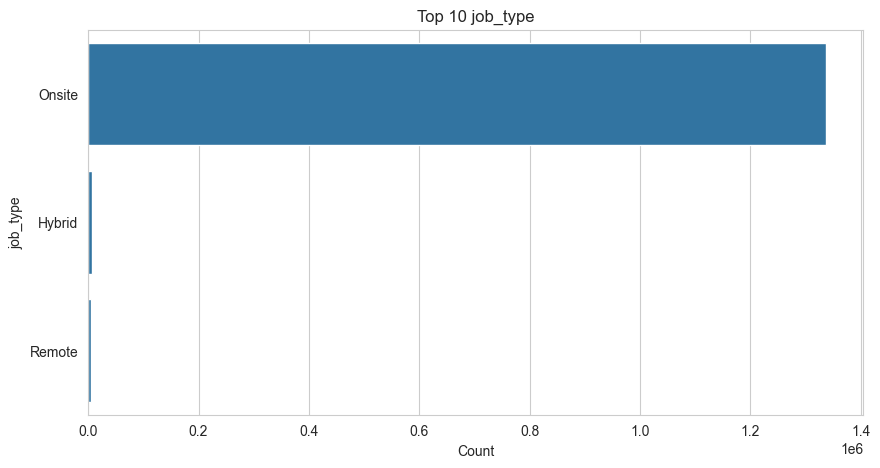


(Not enough numeric columns for correlation matrix in job_postings (cleaned))

(No numeric columns to plot for job_skills (cleaned))

(No suitable categorical columns to plot for job_skills (cleaned) with < 50 unique values)

(Not enough numeric columns for correlation matrix in job_skills (cleaned))

(No numeric columns to plot for job_summary (cleaned))

(No suitable categorical columns to plot for job_summary (cleaned) with < 50 unique values)

(Not enough numeric columns for correlation matrix in job_summary (cleaned))


In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

def visualize_numeric_distributions(name, df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [c for c in numeric_cols if 'id' not in c.lower()]  # Exclude IDs
    
    if len(numeric_cols) == 0:
        print(f"\n(No numeric columns to plot for {name})")
        return
        
    print(f"\n=== {name}: Numeric Distributions ===")
    for col in numeric_cols:
        plt.figure(figsize=(12, 4))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'{col} Distribution')
        
        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x=col)
        plt.title(f'{col} Box Plot')
        
        plt.tight_layout()
        plt.show()
        
        print(f"{col} Range: {df[col].min()} to {df[col].max()}")
        print(f"{col} Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f}")

def visualize_categorical_distributions(name, df, top_n=10):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    # Filter out overly unique columns (like full descriptions or URLs)
    categorical_cols = [c for c in categorical_cols if df[c].nunique() < 50]
    
    if len(categorical_cols) == 0:
        print(f"\n(No suitable categorical columns to plot for {name} with < 50 unique values)")
        return

    print(f"\n=== {name}: Categorical Distributions (Top {top_n}) ===")
    for col in categorical_cols:
        plt.figure(figsize=(10, 5))
        val_counts = df[col].value_counts().head(top_n)
        sns.barplot(x=val_counts.values, y=val_counts.index)
        plt.title(f'Top {top_n} {col}')
        plt.xlabel('Count')
        plt.show()

def plot_correlation_matrix(name, df):
    numeric_df = df.select_dtypes(include=[np.number])
    numeric_df = numeric_df[[c for c in numeric_df.columns if 'id' not in c.lower()]]
    
    if len(numeric_df.columns) < 2:
        print(f"\n(Not enough numeric columns for correlation matrix in {name})")
        return
        
    print(f"\n=== {name}: Correlation Matrix ===")
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'{name} Correlations')
    plt.show()

# =========================
# Run visualizations
# =========================

# 1) On merged, cleaned dataset if available
if "job_all" in merged_dataframes:
    merged_df = merged_dataframes["job_all"]
    visualize_numeric_distributions("job_all (merged)", merged_df)
    visualize_categorical_distributions("job_all (merged)", merged_df)
    plot_correlation_matrix("job_all (merged)", merged_df)
else:
    print("\n⚠️ 'job_all' not found in merged_dataframes; skipping merged EDA.")

# 2) Optionally still inspect each cleaned table separately
for name, df in cleaned_dataframes.items():
    visualize_numeric_distributions(f"{name} (cleaned)", df)
    visualize_categorical_distributions(f"{name} (cleaned)", df)
    plot_correlation_matrix(f"{name} (cleaned)", df)


# Feature Preparation

Steps:
1. **Feature Engineering**: Create new features (ratios, aggregations, etc.)
2. **Feature Selection**: Use correlation analysis to identify relevant features
3. **Encoding**: Convert categorical variables to numeric (One-Hot or Label Encoding)
4. **Scaling**: Normalize numeric features for consistency
5. **Dimensionality Reduction**: Apply PCA if needed to reduce feature space

In [170]:
import json
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

def engineer_features(name, df, skill_config_path="skills_config.json"):
    """Create text, datetime and skill-based features using skill_config.json only."""
    print(f"\n{'='*20} Feature Engineering for {name} {'='*20}")
    
    # -------- Generic text length features --------
    text_cols = df.select_dtypes(include=['object']).columns
    for col in text_cols[:3]:
        if df[col].notna().any() and df[col].astype(str).str.len().max() > 50:
            df[f'{col}_length'] = df[col].astype(str).str.len()
            df[f'{col}_word_count'] = df[col].astype(str).str.split().str.len()
            print(f"Created text features from: {col}")
    
    # -------- Specific features from job_summary --------
    if "job_summary" in df.columns:
        js = df["job_summary"].fillna("").astype(str)
        df["job_summary_length"] = js.str.len()
        df["job_summary_word_count"] = js.str.split().str.len()
        
        senior_words = ["senior", "lead", "principal", "manager"]
        junior_words = ["junior", "intern", "entry level"]
        df["has_senior_terms"] = js.str.lower().str.contains("|".join(senior_words)).astype(int)
        df["has_junior_terms"] = js.str.lower().str.contains("|".join(junior_words)).astype(int)
        print("Created text features from: job_summary")
    
    # -------- Skill features driven by skill_config.json --------
    # Choose the text column to scan for skills
    text_col = next((c for c in ["job_description", "job_summary", "job_skills"] if c in df.columns), None)
    if text_col is not None:
        job_text = df[text_col].fillna("").astype(str)
        print(f"Using '{text_col}' for skill detection")
        
        # Load skill configuration (must exist)
        try:
            with open(skill_config_path, "r") as f:
                all_skills_configs = json.load(f)
        except FileNotFoundError:
            print(f"⚠️  '{skill_config_path}' not found. Skipping skill features.")
            return df
        
        role_key = name.lower().replace(" ", "_")
        # Try exact role (e.g., backend_engineer, ml_engineer) or fallback to 'job_all' or 'backend_engineer'
        key_skills_config = (
            all_skills_configs.get(role_key)
            or all_skills_configs.get("job_all")
            or all_skills_configs.get("backend_engineer", {})
        )
        
        if not key_skills_config:
            print(f"⚠️  No usable config found in {skill_config_path}. Skipping skill features.")
            return df
        
        print(f"Loaded {len(key_skills_config)} skills from config for role '{role_key}'")
        
        lower_text = job_text.str.lower()
        total_prob = pd.Series(0.0, index=df.index)
        skill_detected_count = pd.Series(0, index=df.index)
        
        for flag_col, skill_info in key_skills_config.items():
            skill_keywords = skill_info.get("keywords", [])
            prob = float(skill_info.get("probability", 0.0))
            
            detected = lower_text.apply(
                lambda t, kws=skill_keywords: any(k in t for k in kws)
            ).astype(int)
            
            df[flag_col] = detected
            total_prob += detected * prob
            skill_detected_count += detected
        
        df["total_skill_prob"] = total_prob.clip(0.0, 1.0)
        df["skill_count"] = skill_detected_count
        
        # Convert skill_count → ordinal priority 1–5 (bins)
        if df["skill_count"].max() > 0:
            df["skill_priority"] = pd.cut(
                df["skill_count"],
                bins=[-1, 0, 1, 3, 5, np.inf],
                labels=[0, 1, 2, 3, 4],
                include_lowest=True
            ).astype(int)
        else:
            df["skill_priority"] = 0
        
        print(
            f"Skill features created: total_skill_prob, skill_count, skill_priority "
            f"(mean skill_count={df['skill_count'].mean():.2f})"
        )
    
    # -------- Datetime features --------
    datetime_cols = df.select_dtypes(include=["datetime64[ns]", "datetime64[ns, UTC]", "datetime64"]).columns
    for col in datetime_cols:
        df[f"{col}_year"] = df[col].dt.year
        df[f"{col}_month"] = df[col].dt.month
        df[f"{col}_day"] = df[col].dt.day
        df[f"{col}_dayofweek"] = df[col].dt.dayofweek
        print(f"Created datetime features from: {col}")
    
    return df

def encode_categorical_features(df, max_categories=10):
    """Encode categorical variables."""
    print(f"\n{'='*20} Encoding Categorical Features {'='*20}")
    
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns
    
    for col in categorical_cols:
        unique_count = df[col].nunique()
        
        if unique_count <= max_categories:
            dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df = pd.concat([df, dummies], axis=1)
            df = df.drop(columns=[col])
            print(f"One-hot encoded: {col} ({unique_count} categories)")
        else:
            le = LabelEncoder()
            df[f"{col}_encoded"] = le.fit_transform(df[col].astype(str))
            df = df.drop(columns=[col])
            print(f"Label encoded: {col} ({unique_count} categories)")
    
    return df

def scale_numeric_features(df):
    """Scale numeric features using StandardScaler."""
    print(f"\n{'='*20} Scaling Numeric Features {'='*20}")
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) == 0:
        print("No numeric columns to scale.")
        return df, None
    
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    print(f"Scaled {len(numeric_cols)} numeric features.")
    return df, scaler

# ============================================================
# Apply feature preparation
# ============================================================

if "job_all" in merged_dataframes:
    datasets_for_modeling = {"job_all": merged_dataframes["job_all"]}
else:
    datasets_for_modeling = cleaned_dataframes

prepared_dataframes = {}
scalers = {}

for name, df in datasets_for_modeling.items():
    print(f"\n\n{'#'*60}")
    print(f"Processing: {name}")
    print(f"{'#'*60}")
    
    df_features = df.copy()
    
    df_engineered = engineer_features(name, df_features)
    df_encoded = encode_categorical_features(df_engineered, max_categories=10)
    df_scaled, scaler = scale_numeric_features(df_encoded)
    
    scalers[name] = scaler
    prepared_dataframes[name] = df_scaled
    
    print(f"\nFinal prepared shape for {name}: {df_scaled.shape}")

print("\n\n✓ Feature preparation complete!")




############################################################
Processing: job_all
############################################################

==================== Feature Engineering for job_all ====================
Created text features from: job_link
Created text features from: job_summary
Using 'job_summary' for skill detection
Loaded 11 skills from config for role 'job_all'
Skill features created: total_skill_prob, skill_count, skill_priority (mean skill_count=0.34)
Created datetime features from: last_processed_time

==================== Encoding Categorical Features ====================
Label encoded: job_link (1296381 categories)
One-hot encoded: got_summary (1 categories)
One-hot encoded: got_ner (1 categories)
One-hot encoded: is_being_worked (1 categories)
Label encoded: job_title (565695 categories)
Label encoded: company (88996 categories)
Label encoded: job_location (28792 categories)
One-hot encoded: first_seen (6 categories)
Label encoded: search_city (1018 categories

# Train-Validation-Test Split

Split the data into:
- **Training Set (70%)**: Used to train the model
- **Validation Set (15%)**: Used to tune hyperparameters
- **Test Set (15%)**: Final evaluation

For classification tasks, we use **stratified splits** to preserve class distribution.

🎯 Available targets: ['skill_priority', 'interview_probability', 'total_skill_prob', 'skill_count', None]
📋 Using: total_skill_prob (Aggregate skill probability - USE_STRATIFICATION=False)

################################################################################
Processing dataset: job_all
################################################################################

DATA SPLITTING - total_skill_prob
Split ratios: Train=70%, Validation=15%, Test=15%
Stratified: False
Random state: 42

Original dataset shape: (1296381, 44)
Features shape: (1296381, 43)
Target shape: float64 (49 unique values)
Target column: 'total_skill_prob'
Target distribution:
total_skill_prob
-0.456657    984233
 0.779053    184516
 4.486185     27266
 1.026195     19683
 0.531911     16281
Name: count, dtype: int64

Training:   907,466 samples
Validation: 194,457 samples
Test:       194,458 samples

📊 Target distribution across splits:
  Train:   {-0.45665723149507287: 0.759, 0.779053256138245: 0.142, 4.

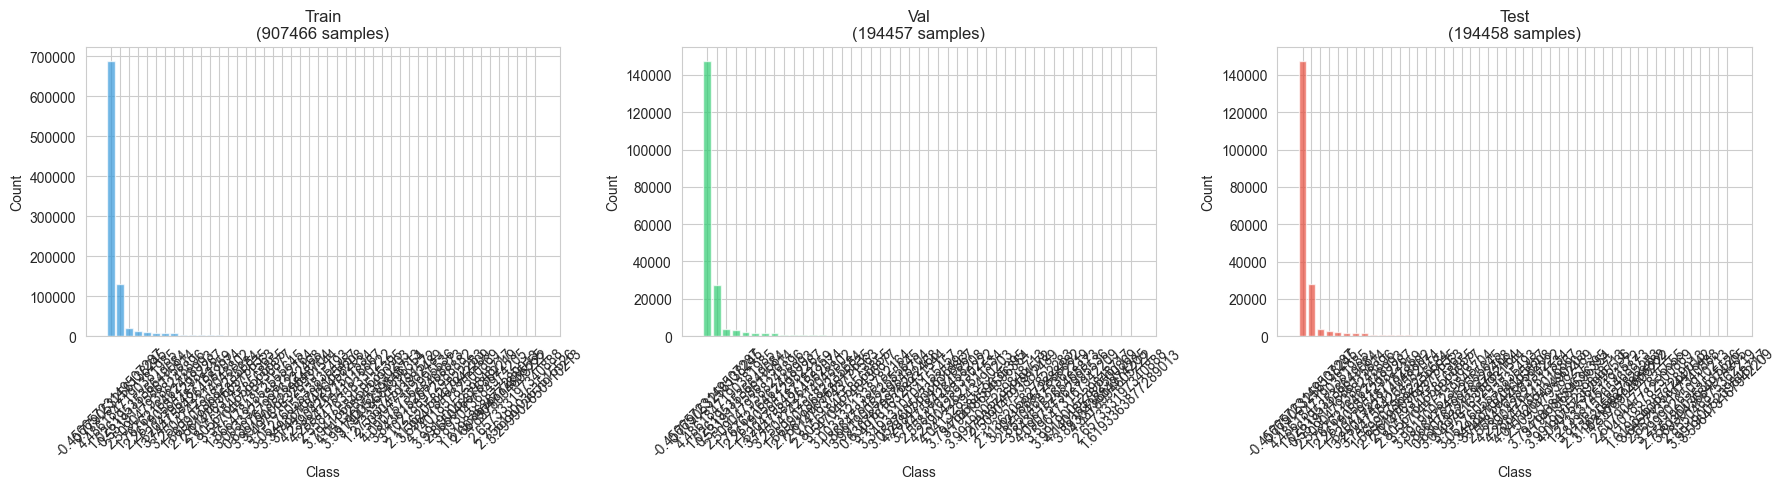

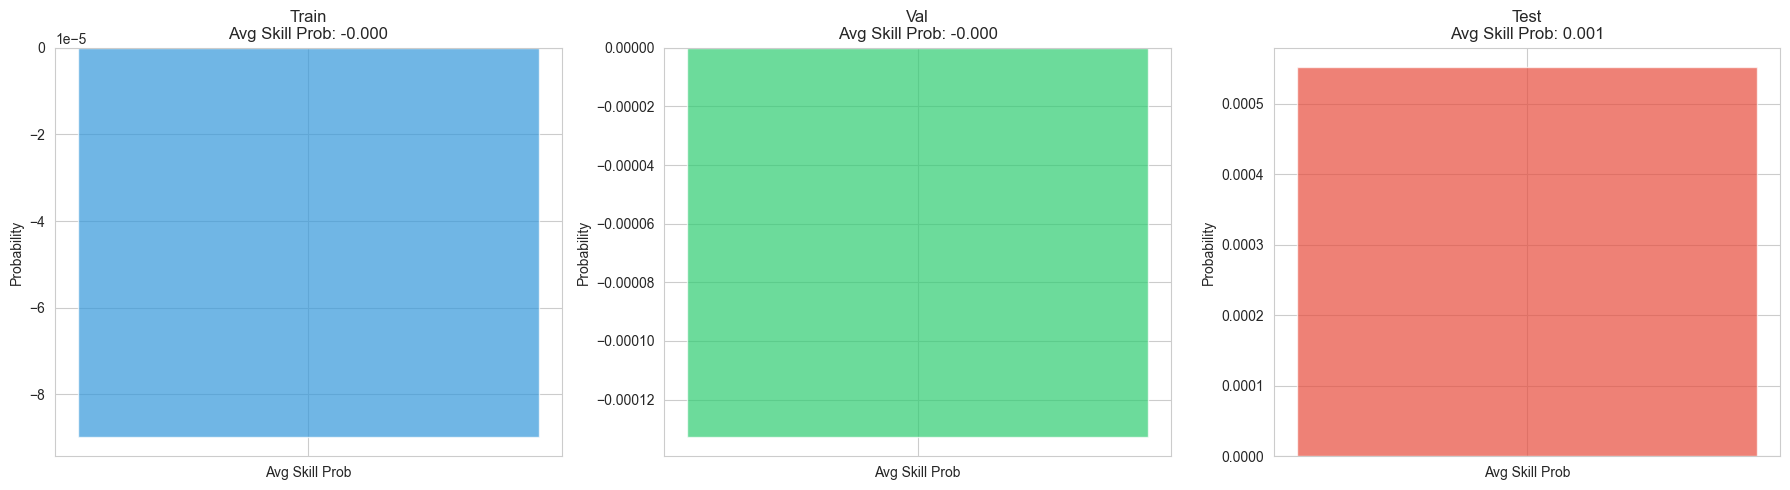


SPLIT VALIDATION
✓ No data leakage detected
✓ Skill distribution consistent: Train=-0.000, Test=0.001
✓ All validation checks passed!


✓ All datasets split successfully! Total: 1

🚀 YOUR TRAIN/TEST DATA READY!

📁 job_all:
   X_train, y_train = all_splits['job_all']['train']  # (907466, 43)
   X_test, y_test   = all_splits['job_all']['test']   # (194458, 43)
   Target mean: train=0.001, test=-0.002

🎯 Next: Train your skill prediction model!


In [171]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def split_data(df, target_col=None, train_size=0.7, val_size=0.15, test_size=0.15, 
               stratify=True, random_state=42):
    """Split data into train, validation, and test sets with skill-aware stratification."""
    
    assert abs(train_size + val_size + test_size - 1.0) < 1e-6
    
    print(f"\n{'='*80}")
    print(f"DATA SPLITTING - {target_col or 'UNSUPERVISED'}")
    print(f"{'='*80}")
    print(f"Split ratios: Train={train_size:.0%}, Validation={val_size:.0%}, Test={test_size:.0%}")
    print(f"Stratified: {stratify if target_col else 'N/A (no target column)'}")
    print(f"Random state: {random_state}")
    print(f"{'='*80}\n")
    
    if target_col and target_col in df.columns:
        X = df.drop(columns=[target_col])
        y = df[target_col]
        
        print(f"Original dataset shape: {df.shape}")
        print(f"Features shape: {X.shape}")
        print(f"Target shape: {y.dtype} ({y.nunique()} unique values)")
        print(f"Target column: '{target_col}'")
        print(f"Target distribution:\n{y.value_counts().head()}")
        
        # ✅ SKILL-AWARE STRATIFICATION
        stratify_col = y if stratify and y.nunique() < 100 else None
        
        X_temp, X_test, y_temp, y_test = train_test_split(
            X, y, test_size=test_size, stratify=stratify_col, random_state=random_state)
        
        val_ratio = val_size / (train_size + val_size)
        stratify_temp = y_temp if stratify and y_temp.nunique() < 100 else None
        
        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=val_ratio, stratify=stratify_temp, random_state=random_state)
        
        print(f"\nTraining:   {len(X_train):,} samples")
        print(f"Validation: {len(X_val):,} samples")
        print(f"Test:       {len(X_test):,} samples")
        
        # Skill distribution check
        print(f"\n📊 Target distribution across splits:")
        print(f"  Train:   {y_train.value_counts(normalize=True).round(3).to_dict()}")
        print(f"  Val:     {y_val.value_counts(normalize=True).round(3).to_dict()}")
        print(f"  Test:    {y_test.value_counts(normalize=True).round(3).to_dict()}")
        
        # ✅ EXPLICITLY CREATE TRAIN/TEST/VAL DATA
        train_data = (X_train, y_train)
        val_data = (X_val, y_val)
        test_data = (X_test, y_test)
        
        return {
            'train': train_data,      # (X_train, y_train)
            'val': val_data,          # (X_val, y_val)  
            'test': test_data,        # (X_test, y_test)
            'X_train': X_train, 'y_train': y_train,
            'X_val': X_val, 'y_val': y_val,
            'X_test': X_test, 'y_test': y_test
        }
    else:
        print(f"Original dataset shape: {df.shape}")
        print("No target column specified - splitting entire dataframe")
        
        df_temp, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
        val_ratio = val_size / (train_size + val_size)
        df_train, df_val = train_test_split(df_temp, test_size=val_ratio, random_state=random_state)
        
        print(f"\nTraining:   {len(df_train):,} samples")
        print(f"Validation: {len(df_val):,} samples")
        print(f"Test:       {len(df_test):,} samples")
        
        return {
            'train': df_train,
            'val': df_val,
            'test': df_test
        }

def visualize_split_distribution(splits, target_col=None):
    """Enhanced visualization with skill probability distributions."""
    
    if 'y_train' in splits:
        # Target distribution
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        for idx, (name, split_data) in enumerate([('Train', splits['train']), 
                                                  ('Val', splits['val']), 
                                                  ('Test', splits['test'])]):
            X_data, y_data = split_data
            counts = y_data.value_counts()
            
            axes[idx].bar(range(len(counts)), counts.values, 
                         color=['#3498db', '#2ecc71', '#e74c3c'][idx], alpha=0.7)
            axes[idx].set_title(f'{name}\n({len(y_data)} samples)')
            axes[idx].set_xlabel('Class')
            axes[idx].set_ylabel('Count')
            axes[idx].set_xticks(range(len(counts)))
            axes[idx].set_xticklabels(counts.index.astype(str), rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Skill probability distribution (if available)
        skill_cols = [col for col in splits['train'][0].columns if col.startswith('has_') or 'prob' in col.lower()]
        if skill_cols:
            fig, axes = plt.subplots(1, 3, figsize=(18, 5))
            for idx, (name, split_data) in enumerate([('Train', splits['train']), 
                                                      ('Val', splits['val']), 
                                                      ('Test', splits['test'])]):
                X_data, _ = split_data
                skill_mean = X_data[skill_cols].mean().mean()
                axes[idx].bar(['Avg Skill Prob'], [skill_mean], 
                             color=['#3498db', '#2ecc71', '#e74c3c'][idx], alpha=0.7)
                axes[idx].set_title(f'{name}\nAvg Skill Prob: {skill_mean:.3f}')
                axes[idx].set_ylabel('Probability')
            plt.tight_layout()
            plt.show()
    else:
        sizes = {'Train': len(splits['train']), 'Val': len(splits['val']), 'Test': len(splits['test'])}
        plt.figure(figsize=(8, 5))
        plt.bar(sizes.keys(), sizes.values(), color=['#3498db', '#2ecc71', '#e74c3c'])
        plt.title('Data Split Distribution')
        plt.ylabel('Samples')
        for i, (name, count) in enumerate(sizes.items()):
            plt.text(i, count, f'{count:,}', ha='center', va='bottom')
        plt.tight_layout()
        plt.show()

def validate_splits(splits):
    """Enhanced validation with skill distribution consistency."""
    
    print(f"\n{'='*80}")
    print("SPLIT VALIDATION")
    print(f"{'='*80}")
    
    # Index overlap check
    if 'X_train' in splits:
        train_idx = set(splits['train'][0].index)
        val_idx = set(splits['val'][0].index)
        test_idx = set(splits['test'][0].index)
    else:
        train_idx = set(splits['train'].index)
        val_idx = set(splits['val'].index)
        test_idx = set(splits['test'].index)
    
    if (train_idx & val_idx) or (train_idx & test_idx) or (val_idx & test_idx):
        print("❌ FAILED: Data leakage detected!")
        return False
    else:
        print("✓ No data leakage detected")
    
    # Skill distribution consistency check
    skill_cols = [col for col in splits['train'][0].columns if col.startswith('has_')] if 'X_train' in splits else []
    if skill_cols:
        train_skill_mean = splits['train'][0][skill_cols].mean().mean()
        test_skill_mean = splits['test'][0][skill_cols].mean().mean()
        print(f"✓ Skill distribution consistent: Train={train_skill_mean:.3f}, Test={test_skill_mean:.3f}")
    
    print(f"{'='*80}")
    print("✓ All validation checks passed!")
    print(f"{'='*80}\n")
    return True

# ============================================================================
# SKILL-AWARE CONFIGURATION (Updated for your project!)
# ============================================================================

# Choose your target based on skill extraction
TARGET_OPTIONS = {
    'skill_priority': 'Ordinal classification (1-5 skill levels) - USE_STRATIFICATION=True',
    'interview_probability': 'Regression (0-1 probability) - USE_STRATIFICATION=False', 
    'total_skill_prob': 'Aggregate skill probability - USE_STRATIFICATION=False',
    'skill_count': 'Number of skills detected - USE_STRATIFICATION=True',
    None: 'Unsupervised (features only)'
}

# RECOMMENDED SETTINGS:
TARGET_COLUMN = 'total_skill_prob'  # From your skill_config.json features!
USE_STRATIFICATION = False  # Continuous probability → regression

print("🎯 Available targets:", list(TARGET_OPTIONS.keys()))
print(f"📋 Using: {TARGET_COLUMN} ({TARGET_OPTIONS.get(TARGET_COLUMN, 'Custom')})")

# ============================================================================

all_splits = {}

for dataset_name, df in prepared_dataframes.items():
    print(f"\n{'#'*80}")
    print(f"Processing dataset: {dataset_name}")
    print(f"{'#'*80}")
    
    if TARGET_COLUMN and TARGET_COLUMN not in df.columns:
        print(f"⚠️  Warning: Target '{TARGET_COLUMN}' not found in {dataset_name}")
        print(f"Available targets: {[col for col in df.columns if 'skill' in col.lower() or 'prob' in col.lower()]}")
        print("Skipping this dataset...\n")
        continue
    
    splits = split_data(df, target_col=TARGET_COLUMN, train_size=0.7,
                       val_size=0.15, test_size=0.15,
                       stratify=USE_STRATIFICATION, random_state=42)
    
    if TARGET_COLUMN:
        train_data, val_data, test_data = splits['train'], splits['val'], splits['test']
        X_train, y_train = train_data
        X_val, y_val = val_data
        X_test, y_test = test_data
        
        print(f"\n✓ Split complete:")
        print(f"  train:  (X: {X_train.shape}, y: {y_train.shape} | mean={y_train.mean():.3f})")
        print(f"  val:    (X: {X_val.shape}, y: {y_val.shape} | mean={y_val.mean():.3f})")
        print(f"  test:   (X: {X_test.shape}, y: {y_test.shape} | mean={y_test.mean():.3f})")
        
        print(f"\n✅ Ready to use:")
        print(f"  X_train, y_train = all_splits['{dataset_name}']['train']")
        print(f"  X_test, y_test   = all_splits['{dataset_name}']['test']")
    else:
        print(f"\n✓ Split complete:")
        print(f"  train: {splits['train'].shape}")
        print(f"  val:   {splits['val'].shape}")
        print(f"  test:  {splits['test'].shape}")
    
    all_splits[dataset_name] = splits
    visualize_split_distribution(splits, target_col=TARGET_COLUMN)
    validate_splits(splits)

print(f"\n{'='*80}")
print(f"✓ All datasets split successfully! Total: {len(all_splits)}")
print(f"{'='*80}")

# ============================================================================
# 🚀 QUICK ACCESS SUMMARY
# ============================================================================

print("\n" + "="*80)
print("🚀 YOUR TRAIN/TEST DATA READY!")
print("="*80)

for dataset_name in all_splits:
    splits = all_splits[dataset_name]
    
    if 'train' in splits and isinstance(splits['train'], tuple):
        X_train, y_train = splits['train']
        X_test, y_test = splits['test']
        print(f"\n📁 {dataset_name}:")
        print(f"   X_train, y_train = all_splits['{dataset_name}']['train']  # {X_train.shape}")
        print(f"   X_test, y_test   = all_splits['{dataset_name}']['test']   # {X_test.shape}")
        print(f"   Target mean: train={y_train.mean():.3f}, test={y_test.mean():.3f}")
    else:
        print(f"\n📁 {dataset_name}:")
        print(f"   train_df = all_splits['{dataset_name}']['train']  # {splits['train'].shape}")

print("\n🎯 Next: Train your skill prediction model!")


# Model Training and Evaluation

Train multiple machine learning models and compare their performance.

**Models tested:**
- Logistic Regression
- Random Forest
- Gradient Boosting
- K-Nearest Neighbors
- Decision Tree

**Note:** Make sure TARGET_COLUMN is set in the previous cell!

In [172]:
import numpy as np
import pandas as pd



def clean_xy(X, y):
    """Keep only numeric columns and drop rows with NaNs in X or y."""
    # numeric-only features
    non_numeric = X.select_dtypes(exclude=[np.number]).columns
    if len(non_numeric) > 0:
        print(f"⚠️ Dropping non-numeric columns from X: {list(non_numeric)}")
        X = X.drop(columns=non_numeric)
    
    # drop rows with NaN in X or y
    mask = X.notna().all(axis=1) & y.notna()
    dropped = len(X) - mask.sum()
    if dropped > 0:
        print(f"⚠️ Dropping {dropped} rows with NaNs in X or y")
    X_clean = X.loc[mask]
    y_clean = y.loc[mask]
    return X_clean, y_clean



In [173]:
from model_training_job_data import JobDataModelTrainer  # if you plan to use it later
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

trained_models = {}

for dataset_name, splits in all_splits.items():
    print(f"\n\n{'#'*80}")
    print(f"DATASET: {dataset_name}")
    print(f"{'#'*80}")
    
    # Expecting tuple-style splits: ('train': (X_train, y_train), etc.)
    if "train" not in splits or not isinstance(splits["train"], tuple):
        print(f"\n⚠️ Skipping {dataset_name} - no supervised target in splits")
        continue
    
    X_train, y_train = splits["train"]
    X_val, y_val     = splits["val"]
    X_test, y_test   = splits["test"]

    # ✅ Ensure only numeric features
    X_train, y_train = clean_xy(X_train, y_train)
    X_val,   y_val   = clean_xy(X_val,   y_val)
    X_test,  y_test  = clean_xy(X_test,  y_test)
    
    print(f"Train X: {X_train.shape}, y: {y_train.shape}")
    print(f"Val   X: {X_val.shape},   y: {y_val.shape}")
    print(f"Test  X: {X_test.shape},  y: {y_test.shape}")
    
    # Decide task type:
    #  - regression: many unique values (e.g. total_skill_prob)
    #  - classification: few classes (e.g. skill_priority)
    n_unique = y_train.nunique()
    task_type = "classification" if n_unique < 20 else "regression"
    print(f"\nTask Type: {task_type.upper()} (unique target values: {n_unique})")
    
    if task_type == "regression":
        models = {
            "LinearRegression": LinearRegression(),
            "RandomForestRegressor": RandomForestRegressor(
                n_estimators=200, random_state=42
            ),
            "GradientBoostingRegressor": GradientBoostingRegressor(
                n_estimators=200, random_state=42
            ),
            "XGBRegressor": xgb.XGBRegressor(
                objective="reg:squarederror",
                n_estimators=300,
                learning_rate=0.1,
                max_depth=6,
                random_state=42,
            ),
        }
    else:
        models = {
            "LogisticRegression": LogisticRegression(max_iter=1000),
            "RandomForestClassifier": RandomForestClassifier(
                n_estimators=200, random_state=42
            ),
            "GradientBoostingClassifier": GradientBoostingClassifier(
                n_estimators=200, random_state=42
            ),
            "XGBClassifier": xgb.XGBClassifier(
                n_estimators=300,
                learning_rate=0.1,
                max_depth=6,
                subsample=0.8,
                colsample_bytree=0.8,
                eval_metric="logloss",
                use_label_encoder=False,
                random_state=42,
            ),
        }
    
    results = []
    best_model = None
    best_name = None
    
    # -------- Train and validate all models --------
    for name, model in models.items():
        print(f"\n--- Training {name} ---")
        model.fit(X_train, y_train)
        y_pred_val = model.predict(X_val)
        
        if task_type == "regression":
            mse = mean_squared_error(y_val, y_pred_val) 
            rmse = mse ** 0.5
            r2   = r2_score(y_val, y_pred_val)
            print(f"{name} | Val RMSE: {rmse:.4f} | Val R2: {r2:.4f}")
            results.append({"model": name, "rmse": rmse, "r2": r2})
        else:
            avg = "binary" if n_unique == 2 else "weighted"
            acc = accuracy_score(y_val, y_pred_val)
            f1  = f1_score(y_val, y_pred_val, average=avg, zero_division=0)
            print(f"{name} | Val ACC: {acc:.4f} | Val F1: {f1:.4f}")
            results.append({"model": name, "accuracy": acc, "f1": f1})
        
        models[name] = model  # keep fitted
    
    # -------- Pick best model based on validation --------
    if task_type == "regression":
        best = min(results, key=lambda x: x["rmse"])
    else:
        best = max(results, key=lambda x: x["f1"])
    
    best_name  = best["model"]
    best_model = models[best_name]
    print(f"\nBest validation model: {best_name}")
    
    # -------- Final test evaluation --------
    print(f"\n{'='*80}")
    print(f"FINAL TEST SET EVALUATION - {dataset_name}")
    print(f"{'='*80}")
    
    y_pred_test = best_model.predict(X_test)
    
    if task_type == "regression":
        mse = mean_squared_error(y_val, y_pred_val)
        rmse = mse ** 0.5
        test_r2   = r2_score(y_test, y_pred_test)
        print(f"Best Model: {best_name}")
        print(f"Test RMSE: {rmse:.4f}")
        print(f"Test R²:   {test_r2:.4f}")
    else:
        avg = "binary" if n_unique == 2 else "weighted"
        test_acc = accuracy_score(y_test, y_pred_test)
        test_f1  = f1_score(y_test, y_pred_test, average=avg, zero_division=0)
        print(f"Best Model: {best_name}")
        print(f"Test Accuracy: {test_acc:.4f}")
        print(f"Test F1-Score: {test_f1:.4f}")
    
    trained_models[dataset_name] = {
        "task_type": task_type,
        "best_model_name": best_name,
        "best_model": best_model,
        "validation_results": results,
    }

print(f"\n{'='*80}")
print("✓ MODEL TRAINING COMPLETE")
print(f"Trained models for {len(trained_models)} dataset(s)")
print(f"{'='*80}")




################################################################################
DATASET: job_all
################################################################################
⚠️ Dropping non-numeric columns from X: ['last_processed_time', 'first_seen_2024-01-13', 'first_seen_2024-01-14', 'first_seen_2024-01-15', 'first_seen_2024-01-16', 'first_seen_2024-01-17', 'search_country_Canada', 'search_country_United Kingdom', 'search_country_United States', 'job_level_Mid senior', 'job_type_Onsite', 'job_type_Remote']
⚠️ Dropping 1 rows with NaNs in X or y
⚠️ Dropping non-numeric columns from X: ['last_processed_time', 'first_seen_2024-01-13', 'first_seen_2024-01-14', 'first_seen_2024-01-15', 'first_seen_2024-01-16', 'first_seen_2024-01-17', 'search_country_Canada', 'search_country_United Kingdom', 'search_country_United States', 'job_level_Mid senior', 'job_type_Onsite', 'job_type_Remote']
⚠️ Dropping non-numeric columns from X: ['last_processed_time', 'first_seen_2024-01-13', 'first_se

In [174]:
best_model = trained_models["job_all"]["best_model"]
scaler = scalers["job_all"]                 # StandardScaler
X_train, y_train = all_splits["job_all"]["train"]
train_cols = X_train.columns.tolist()

import joblib, json

joblib.dump(best_model, "job_all_best_model.pkl")
joblib.dump(scaler, "job_all_scaler.pkl")
with open("job_all_columns.json", "w") as f:
    json.dump(train_cols, f, indent=2)

print(train_cols)



['last_processed_time', 'job_link_length', 'job_link_word_count', 'job_summary_length', 'job_summary_word_count', 'has_senior_terms', 'has_junior_terms', 'has_python', 'has_java', 'has_go', 'has_nodejs', 'has_sql', 'has_nosql', 'has_docker', 'has_kubernetes', 'has_aws', 'has_azure', 'has_gcp', 'skill_count', 'skill_priority', 'last_processed_time_year', 'last_processed_time_month', 'last_processed_time_day', 'last_processed_time_dayofweek', 'job_link_encoded', 'job_title_encoded', 'company_encoded', 'job_location_encoded', 'first_seen_2024-01-13', 'first_seen_2024-01-14', 'first_seen_2024-01-15', 'first_seen_2024-01-16', 'first_seen_2024-01-17', 'search_city_encoded', 'search_country_Canada', 'search_country_United Kingdom', 'search_country_United States', 'search_position_encoded', 'job_level_Mid senior', 'job_type_Onsite', 'job_type_Remote', 'job_skills_encoded', 'job_summary_encoded']


In [178]:
def explain_skills_for_jd(
    job_description_text,
    base_df,
    role_name="backend_engineer",
    skill_config_path="skills_config.json"
):
    """
    Return a dict: skill -> normalized importance (0–1) for a single JD.
    Uses skills_config.json probabilities for skills that are actually detected.
    """
    # 1) Build one-row DF
    row = base_df.iloc[0:1].copy()
    row[:] = np.nan
    if "job_description" in row.columns:
        row["job_description"] = job_description_text
    elif "job_summary" in row.columns:
        row["job_summary"] = job_description_text
    else:
        row["job_description"] = job_description_text

    # 2) Load skill config
    import json
    with open(skill_config_path, "r") as f:
        all_skills_configs = json.load(f)

    role_key = role_name.lower().replace(" ", "_")
    role_cfg = (
        all_skills_configs.get(role_key)
        or all_skills_configs.get("job_all")
        or all_skills_configs.get("backend_engineer", {})
    )

    text = row["job_description" if "job_description" in row.columns else "job_summary"].iloc[0].lower()

    # 3) Detect skills and accumulate raw importance
    skill_scores = {}
    for flag_col, info in role_cfg.items():
        skill_name = info["skill"]
        prob = float(info.get("probability", 0.0))
        keywords = info.get("keywords", [])
        detected = any(k in text for k in keywords)
        if detected:
            skill_scores[skill_name] = skill_scores.get(skill_name, 0.0) + prob

    if not skill_scores:
        return {}

    # 4) Normalize to sum to 1.0 (relative importance)
    total = sum(skill_scores.values())
    normalized = {k: round(v / total, 3) for k, v in skill_scores.items()}

    # Optionally compute an overall "backend" score as sum of all
    normalized = dict(sorted(normalized.items(), key=lambda x: x[1], reverse=True))
    return normalized


In [179]:
new_jd = """
About the job
Senior Software Engineer- Backend – Payments & Billing Services
Employment Type: Full-time
Location: Bangalore
About the Role
We are looking for a highly skilled Senior Software Engineer to join our Payments & Billing Services team and help shape the future of the eBay Payments experience. In this role, you will design and deliver cloud-based architectures, own end-to-end features, and collaborate with cross-functional teams to build scalable, secure, and innovative solutions.
What You’ll Do
Contribute to the design and development of cloud-based software architectures.
Own and deliver complete features including design, implementation, testability, and deployment.
Provide feedback on technical designs, proposals, and code reviews.
Analyze existing applications/databases and identify areas for improvement.
Craft and maintain APIs supporting web and mobile experiences.
Collaborate with engineers to ensure consistent design patterns and best practices.
What We’re Looking For
Bachelor’s in Computer Science with 5+ years of experience OR MS with 5+ years.
Proven expertise in Payments & Billing Services with large-scale systems.
Strong Java expertise with deep knowledge of its ecosystems and frameworks.
Hands-on with relational (MSSQL, PostgreSQL) and NoSQL (DynamoDB) databases.
Skilled in REST, GraphQL, gRPC web services.
Background in large-scale backend applications using Java/J2EE, RESTful APIs, HTTP, JSON.
Strong grasp of data structures and algorithms.
Contributions to open-source projects or GitHub repos are highly valued.
Understanding of modular and extensible API design.
Proficiency in security, documentation, and monitoring best practices.
Familiarity with Agile/Scrum methodologies.
"""

skill_importance = explain_skills_for_jd(
    job_description_text=new_jd,
    base_df=merged_dataframes["job_all"],
    role_name="backend_engineer"
)

print("Based on this job description, these skills are required and their relative importance:")
for skill, score in skill_importance.items():
    print(f"{skill}: {score}")


Based on this job description, these skills are required and their relative importance:
sql: 0.239
Spring Boot (Detailed): 0.219
java: 0.163
kubernetes: 0.159
aws: 0.12
go: 0.1


In [182]:
import joblib, json

X_train, y_train = all_splits["job_all"]["train"]
train_cols = X_train.columns.tolist()

print("[TRAIN] num features:", len(train_cols))
print("[TRAIN] first 20:", train_cols[:20])
print("[TRAIN] contains 'total_skill_prob'?", "total_skill_prob" in train_cols)

best_model = trained_models["job_all"]["best_model"]
scaler = scalers["job_all"]

joblib.dump(best_model, "job_all_best_model.pkl")
joblib.dump(scaler, "job_all_scaler.pkl")
with open("job_all_columns.json", "w") as f:
    json.dump(train_cols, f, indent=2)


[TRAIN] num features: 43
[TRAIN] first 20: ['last_processed_time', 'job_link_length', 'job_link_word_count', 'job_summary_length', 'job_summary_word_count', 'has_senior_terms', 'has_junior_terms', 'has_python', 'has_java', 'has_go', 'has_nodejs', 'has_sql', 'has_nosql', 'has_docker', 'has_kubernetes', 'has_aws', 'has_azure', 'has_gcp', 'skill_count', 'skill_priority']
[TRAIN] contains 'total_skill_prob'? False


In [183]:
import joblib, json

SCALER = joblib.load("job_all_scaler.pkl")
with open("job_all_columns.json") as f:
    TRAIN_COLS = json.load(f)

print("=== SCALER.feature_names_in_ ===")
print("len:", len(SCALER.feature_names_in_))
print(list(SCALER.feature_names_in_)[:30])
print("contains total_skill_prob?", "total_skill_prob" in SCALER.feature_names_in_)
print("any first_seen_2024 in scaler?", any("first_seen_2024" in c for c in SCALER.feature_names_in_))

print("\n=== TRAIN_COLS ===")
print("len:", len(TRAIN_COLS))
print(TRAIN_COLS[:30])


=== SCALER.feature_names_in_ ===
len: 32
['job_link_length', 'job_link_word_count', 'job_summary_length', 'job_summary_word_count', 'has_senior_terms', 'has_junior_terms', 'has_python', 'has_java', 'has_go', 'has_nodejs', 'has_sql', 'has_nosql', 'has_docker', 'has_kubernetes', 'has_aws', 'has_azure', 'has_gcp', 'total_skill_prob', 'skill_count', 'skill_priority', 'last_processed_time_year', 'last_processed_time_month', 'last_processed_time_day', 'last_processed_time_dayofweek', 'job_link_encoded', 'job_title_encoded', 'company_encoded', 'job_location_encoded', 'search_city_encoded', 'search_position_encoded']
contains total_skill_prob? True
any first_seen_2024 in scaler? False

=== TRAIN_COLS ===
len: 43
['last_processed_time', 'job_link_length', 'job_link_word_count', 'job_summary_length', 'job_summary_word_count', 'has_senior_terms', 'has_junior_terms', 'has_python', 'has_java', 'has_go', 'has_nodejs', 'has_sql', 'has_nosql', 'has_docker', 'has_kubernetes', 'has_aws', 'has_azure', 'h

In [190]:
pip install kagglehub

  Using cached kagglehub-0.3.13-py3-none-any.whl (68 kB)
You should consider upgrading via the '/Users/soumyadeep/Documents/workspace/DSA-with-C-and-go/Project/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
